In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving drug200.xlsx to drug200.xlsx


{'drug200.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
df=pd.read_excel('drug200.xlsx')
print (df)

       Age Sex      BP Cholesterol   Drug
0    20-30   F    HIGH        HIGH  drugY
1    40-50   M     LOW        HIGH  drugC
2    40-50   M     LOW        HIGH  drugC
3    20-30   F  NORMAL        HIGH  drugX
4      >60   F     LOW        HIGH  drugY
..     ...  ..     ...         ...    ...
195  50-60   F     LOW        HIGH  drugC
196    <20   M     LOW        HIGH  drugC
197  50-60   M  NORMAL        HIGH  drugX
198  20-30   M  NORMAL      NORMAL  drugX
199  30-40   F     LOW      NORMAL  drugX

[200 rows x 5 columns]


In [ ]:
df.dtypes

Age            object
Sex            object
BP             object
Cholesterol    object
Drug           object
dtype: object

In [ ]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Drug           0
dtype: int64

In [ ]:
col_names=['Age','Sex','Cholesterol','BP','Drug']
for col in col_names:
  print(df[col].value_counts())

40-50    40
>60      40
30-40    39
50-60    33
20-30    32
<20      16
Name: Age, dtype: int64
M    104
F     96
Name: Sex, dtype: int64
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [ ]:
from sklearn import preprocessing
le_age=preprocessing.LabelEncoder()
le_age.fit(['<20','20-30','30-40','30-40','40-50','50-60','>60'])
df['Age']=le_age.transform(df['Age'])

In [ ]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['M','F'])
df['Sex']=le_sex.transform(df['Sex'])

In [ ]:
from sklearn import preprocessing
le_cl=preprocessing.LabelEncoder()
le_cl.fit(['HIGH','NORMAL'])
df['Cholesterol']=le_cl.transform(df['Cholesterol'])

In [ ]:
from sklearn import preprocessing
le_bp=preprocessing.LabelEncoder()
le_bp.fit(['HIGH','LOW','NORMAL'])
df['BP']=le_bp.transform(df['BP'])

In [ ]:
print(df)

     Age  Sex  BP  Cholesterol   Drug
0      0    0   0            0  drugY
1      2    1   1            0  drugC
2      2    1   1            0  drugC
3      0    0   2            0  drugX
4      5    0   1            0  drugY
..   ...  ...  ..          ...    ...
195    3    0   1            0  drugC
196    4    1   1            0  drugC
197    3    1   2            0  drugX
198    0    1   2            1  drugX
199    1    0   1            1  drugX

[200 rows x 5 columns]


In [ ]:
X=df.drop(['Drug'],axis=1)
y=df['Drug']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X , y, test_size=0.15 , random_state = 42)
X_train.shape, X_test.shape

((170, 4), (30, 4))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Tree=DecisionTreeClassifier(criterion='entropy')
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
predTree_train=Tree.predict(X_train)
hasil_train=pd.DataFrame ({'Predicted_drug':predTree_train,'Actual_drug':y_train})
print(hasil_train)

    Predicted_drug Actual_drug
9            drugX       drugY
18           drugC       drugC
55           drugC       drugC
75           drugY       drugY
150          drugA       drugA
..             ...         ...
106          drugY       drugX
14           drugX       drugX
92           drugY       drugY
179          drugY       drugY
102          drugC       drugC

[170 rows x 2 columns]


In [ ]:
predTree_test=Tree.predict(X_test)
hasil_test=pd.DataFrame ({'Predicted_drug':predTree_test,'Actual_drug':y_test})
print(hasil_test)

    Predicted_drug Actual_drug
95           drugX       drugX
15           drugY       drugY
30           drugX       drugX
158          drugY       drugC
128          drugX       drugY
115          drugB       drugY
69           drugY       drugY
170          drugX       drugX
174          drugA       drugA
45           drugX       drugX
66           drugA       drugA
182          drugY       drugX
165          drugC       drugY
78           drugA       drugA
186          drugB       drugB
177          drugY       drugY
56           drugY       drugB
152          drugX       drugX
82           drugY       drugC
68           drugX       drugY
124          drugB       drugB
16           drugY       drugX
148          drugX       drugX
93           drugY       drugY
65           drugX       drugY
60           drugX       drugY
84           drugC       drugC
67           drugX       drugX
125          drugY       drugY
132          drugX       drugX


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cnfMatrix_train=confusion_matrix(y_train,predTree_train)
print ('Decision Tree Accuracy:',metrics.accuracy_score(y_train,predTree_train))
cnfMatrix_train

Decision Tree Accuracy: 0.7529411764705882


array([[15,  0,  0,  0,  5],
       [ 0, 12,  0,  0,  1],
       [ 0,  0, 12,  0,  1],
       [ 0,  0,  0, 40,  4],
       [ 4,  5,  7, 15, 49]])

In [ ]:
cnfMatrix_test=confusion_matrix(y_test,predTree_test)
print ('Decision Tree Accuracy:',metrics.accuracy_score(y_test,predTree_test))
cnfMatrix_test

Decision Tree Accuracy: 0.6333333333333333


array([[3, 0, 0, 0, 0],
       [0, 2, 0, 0, 1],
       [0, 0, 1, 0, 2],
       [0, 0, 0, 8, 2],
       [0, 1, 1, 4, 5]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predTree_train))

              precision    recall  f1-score   support

       drugA       0.79      0.75      0.77        20
       drugB       0.71      0.92      0.80        13
       drugC       0.63      0.92      0.75        13
       drugX       0.73      0.91      0.81        44
       drugY       0.82      0.61      0.70        80

    accuracy                           0.75       170
   macro avg       0.73      0.82      0.77       170
weighted avg       0.77      0.75      0.75       170



In [ ]:
print(classification_report(y_test,predTree_test))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       0.67      0.67      0.67         3
       drugC       0.50      0.33      0.40         3
       drugX       0.67      0.80      0.73        10
       drugY       0.50      0.45      0.48        11

    accuracy                           0.63        30
   macro avg       0.67      0.65      0.65        30
weighted avg       0.62      0.63      0.62        30



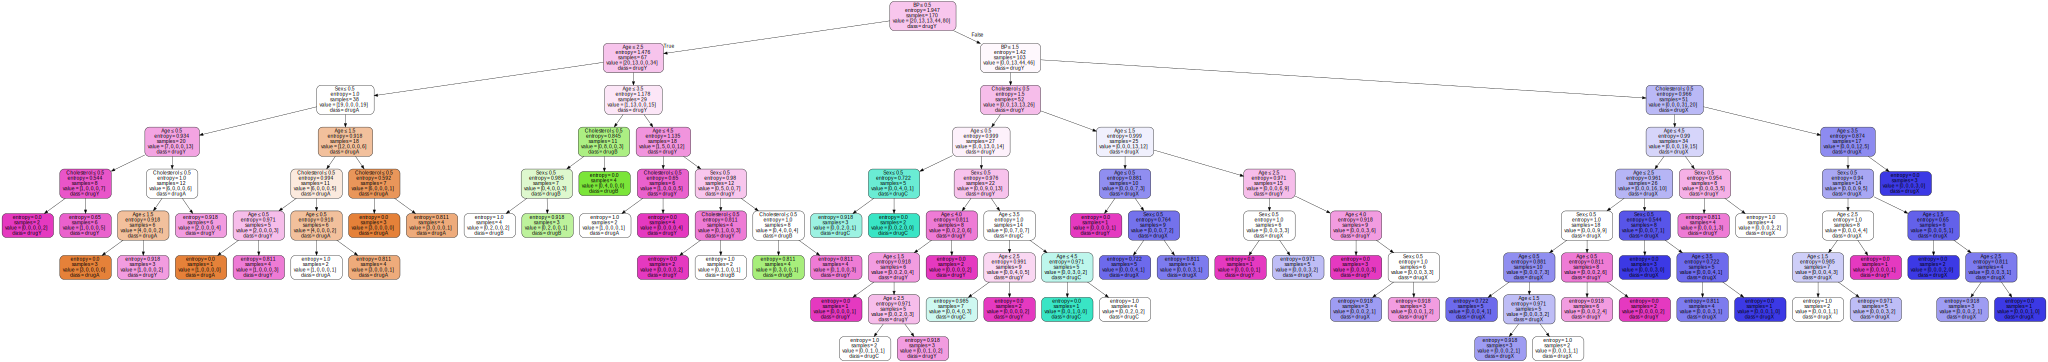

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(Tree,out_file=None,feature_names=X_train.columns,class_names=np.unique(y_train),filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph